In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import EpiClockNBL.src.util as nbl_util
import EpiClockNBL.Select_fCpGs.util as local_util
nbl_consts = nbl_util.consts

proj_dir = os.path.join(nbl_consts['official_indir'], 'Heinrich')

# Sample annotations

In [2]:
## Sample annotations

sample_annotations = pd.read_table(os.path.join(proj_dir, 'sample_annotations.txt'), index_col=0).T

# Process all columns
col_list = []
for i in range(sample_annotations.shape[1]):
    col = sample_annotations.iloc[:, i]
    if col.name == 'Sample_characteristics_ch1':
        col_split = col.str.split(': ', expand=True)
        assert col_split[0].unique().shape[0] == 1
        col_list.append(col_split[1].rename(col_split.iloc[0, 0]))
    else:
        col_list.append(col)
sample_annotations_clean = pd.concat(col_list, axis=1)

sample_annotations_clean.to_csv(os.path.join(proj_dir, 'sample_annotations_clean.txt'), sep='\t')

# Import beta values

In [3]:
## Beta values

beta_values = pd.read_table(os.path.join(proj_dir, 'beta_values.txt'), index_col=0)

# Purity QC

In [4]:
## Filter samples based on LUMP purity value

LUMP_THRESH = nbl_consts['LUMP_threshold']

LUMP_purity = nbl_util.getLUMP_values(beta_values)
pureSamples = LUMP_purity.index[LUMP_purity >= LUMP_THRESH].to_numpy()
LUMP_purity.to_csv(os.path.join(proj_dir, 'LUMP_purity.txt'), sep='\t')

Only 26 LUMP sites were available...


Text(0.5, 1.0, 'Heinrich Dataset')

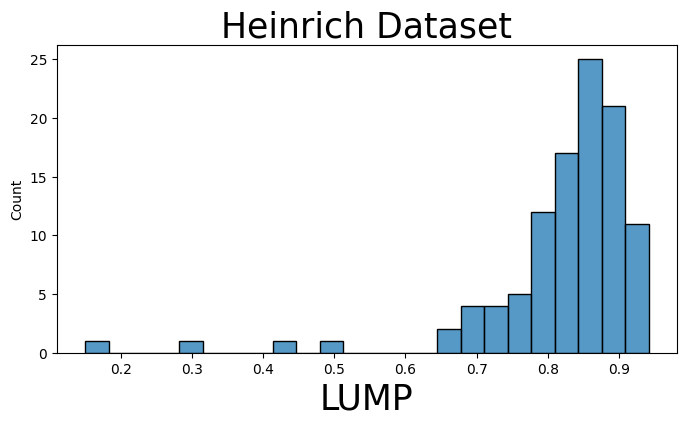

In [5]:
sf = 1

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(LUMP_purity)

ax.set_xlabel(r'LUMP', fontsize=nbl_consts['labelfontsize']*sf)
ax.set_title('Heinrich Dataset', fontsize=nbl_consts['labelfontsize']*sf)

# Select fCpGs

In [8]:
## I SHOULDN'T HAVE USED THS AS A NORMAL SAMPLE

normals_TCGA_name = 'GBM_LGG'
criteria = local_util.CLOCK_CRITERIA.copy()

path_dict = {}
path_dict['tumor'] = os.path.join(proj_dir, 'beta_values.txt')
path_dict['normal'] = os.path.join(nbl_consts['official_indir'], 'Normals', f'beta_values-{normals_TCGA_name}.tsv')

data = local_util.getDataDict(path_dict, filter_tum_samps=False, assert_same_sites=False)
data['tumor']['beta_values'] = data['tumor']['beta_values'].dropna(axis=1, how='all')
data['tumor']['pureSamples'] = data['tumor']['pureSamples'][np.isin(data['tumor']['pureSamples'], data['tumor']['beta_values'].columns)]


In [9]:
outfile_path = os.path.join(proj_dir, 'beta_values_unbiased_sites.txt')

unbiased_sites = local_util.gen_CpG_set(data, criteria=criteria, neutral_DNA_CpG_list=None)
data['tumor']['beta_values_SELECTION'].loc[unbiased_sites].to_csv(outfile_path, sep='\t')

Selecting CpGs with:
	105 TCGA samples
	4 normal samples
